## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [455]:
iris_data_1 = pd.read_csv('Iris.csv')

In [456]:
iris_data=iris_data_1.copy()
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [457]:
# Check dimension of data

In [458]:
iris_data.set_index('Id', inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [459]:
iris_data.shape

(152, 5)

In [460]:
#Check data Type

In [461]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1 to 152
Data columns (total 5 columns):
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 7.1+ KB


In [462]:
# Check for NaN/Null values

In [463]:
print('From info, we can see that there are NaN values present in the dataset')
print('Checking for Nan Values\n',iris_data.isna().sum())

From info, we can see that there are NaN values present in the dataset
Checking for Nan Values
 SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

In [464]:
iris_data.quantile(.50)

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
Name: 0.5, dtype: float64

In [465]:
print('Replaced the NaN values to median')
iris_data=iris_data.fillna((iris_data.quantile(0.50)))    
iris_data.isna().sum()

Replaced the NaN values to median


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [466]:
x=iris_data.drop(columns=['Species'])
y=iris_data['Species']

In [467]:
#Check the dataset
print(y.head())
print('\n',x.head())

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                          
1             5.1           3.5            1.4           0.2
2             4.9           3.0            1.4           0.2
3             4.7           3.2            1.3           0.2
4             4.6           3.1            1.5           0.2
5             5.0           3.6            1.4           0.2


### Find the distribution of target variable (Class) (1 Marks)

In [468]:
## Target Variable Frequency Distribution
freq=pd.DataFrame([iris_data['Species'].value_counts()]).T
freq.reset_index(inplace=True)
freq.columns=['Species','Count']
freq['Prop']=freq['Count']/(freq['Count'].sum())
freq

,Species,Count,Prop
0,Iris-virginica,52,0.342105
1,Iris-setosa,50,0.328947
2,Iris-versicolor,50,0.328947



### Plot the distribution of target variable using histogram

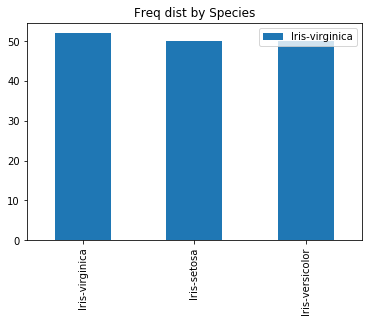

In [469]:
dist=iris_data['Species'].value_counts()
ax=dist.plot(kind='bar')
ax.set_title('Freq dist by Species')
ax.set_xticklabels(('Iris-virginica', 'Iris-setosa', 'Iris-versicolor'))
ax.legend(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026899BA0588>,
      dtype=object)

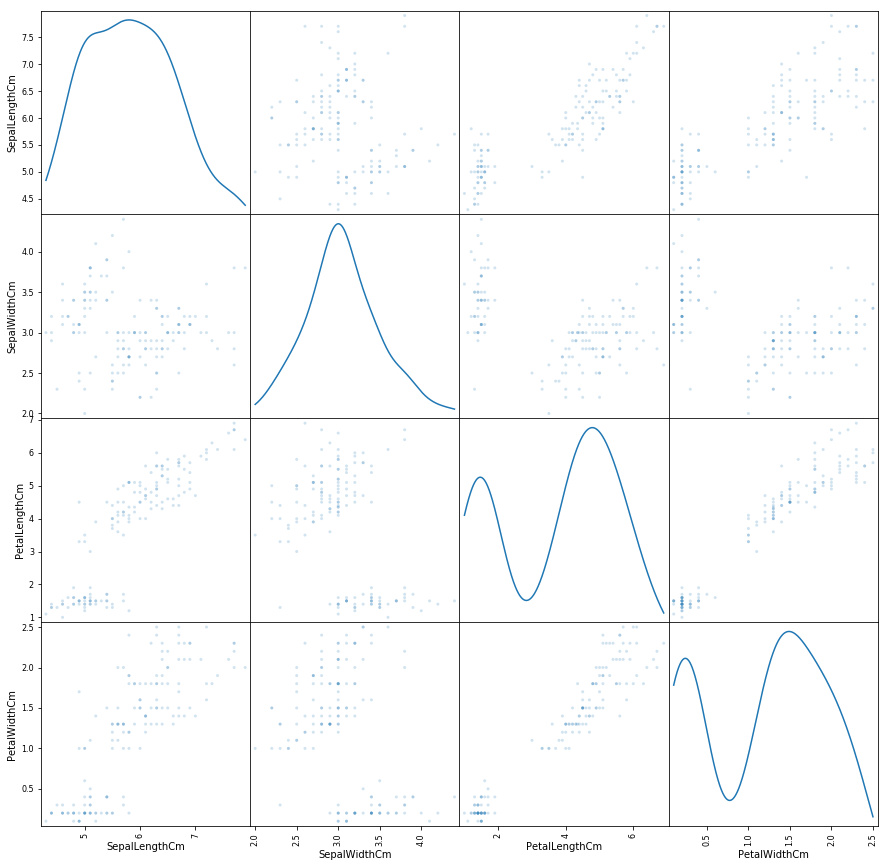

In [470]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_data, alpha=0.2,diagonal='kde',figsize=(15, 15))

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [471]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.3,1.30,1.8,2.5


In [472]:
print('From the stat summary, we can observe the following:')
print('1) There are 152 records/Observations','\n2) Standard Deviation for SeplLength and SepalWidth is 5.8 and 3.0','\n3) SpalWidth and SepalLenght has max and min of 2.0,4.3 and 4.4,7.9')

From the stat summary, we can observe the following:
1) There are 152 records/Observations 
2) Standard Deviation for SeplLength and SepalWidth is 5.8 and 3.0 
3) SpalWidth and SepalLenght has max and min of 2.0,4.3 and 4.4,7.9


In [473]:
#Drop Id variable from data

In [474]:
iris_data.reset_index(inplace=True)
iris_data=iris_data.drop(columns=['Id'])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Correlation among all variables and give your insights (1 Marks)

In [475]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [476]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


We can observe below: 
 1) "Petallegth" and "PetalWidth" are highly corelated to "SepalLength" at >0.80, which means a unit change in SepalLength will lead to 0.82 and 0.87 changes in "PetalWidth" and "PetalLength". 

2) "PetalLength" and "PetalWidth" are highly corelated at 0.96, that means, 0.96 change in "PetalWidth" can be observed when there is a unit change in "PetalLength".


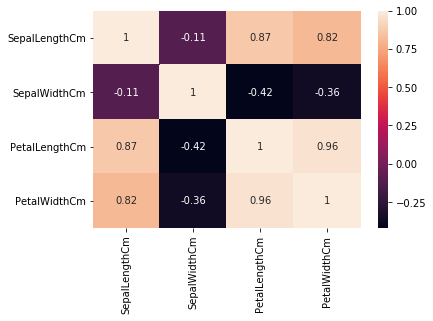

In [477]:
import seaborn as sns
print('We can observe below: \n 1) "Petallegth" and "PetalWidth" are highly corelated to "SepalLength" at >0.80, which means a unit change in SepalLength will lead to 0.82 and 0.87 changes in "PetalWidth" and "PetalLength".',
      '\n\n2) "PetalLength" and "PetalWidth" are highly corelated at 0.96, that means, 0.96 change in "PetalWidth" can be observed when there is a unit change in "PetalLength".')
sns.heatmap(iris_data.corr(),annot=True)

### Split data in Training and Validation in 80:20 (1 Marks)

In [478]:
iris_data['Species']=iris_data['Species'].map(lambda x:0 if x=='Iris-setosa' else (1 if x=='Iris-virginica' else 2))

In [487]:
x=iris_data.drop(columns=['Species'])
y=iris_data['Species'].astype('str')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: object

### Do Feature Scaling ( 1 Marks)

In [488]:
# Use StandardScaler or similar methods

In [489]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_value = scaler.fit_transform(x)
x_scaler=pd.DataFrame(scaled_value,columns=x.columns)
x_scaler.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.90675,1.040463,-1.353632,-1.325008
1,-1.15069,-0.124120,-1.353632,-1.325008
2,-1.39463,0.341713,-1.410833,-1.325008
3,-1.51660,0.108797,-1.296431,-1.325008
4,-1.02872,1.273380,-1.353632,-1.325008


### SPLITTING INTO TRAINING AND TEST SETS

In [531]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaler,y,train_size=0.80, random_state=45)

### Train and Fit NaiveBayes Model(2 Marks)

In [532]:
#Fit the model

In [533]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [534]:
#Predict

In [535]:
NB.predict(x_train)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2,
       1, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1], dtype=int64)

In [536]:
NB.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2,
       1, 1, 0, 2, 0, 2, 0, 2, 2], dtype=int64)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [537]:
# show Confusion Matrix

In [538]:
y_pred_test = NB.predict(x_test)
y_pred_train = NB.predict(x_train)

Confusion matrix for test dataset


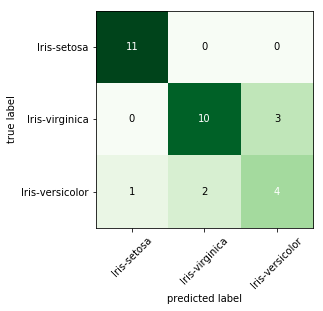

In [539]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

iris_con_test=confusion_matrix(y_test,y_pred_test)
iris_con_train=confusion_matrix(y_train,y_pred_train)
print('Confusion matrix for test dataset')
fig, ax = plot_confusion_matrix(conf_mat=iris_con_test,class_names=['Iris-setosa','Iris-virginica','Iris-versicolor'],cmap='Greens')
plt.show()

Confusion matrix for train dataset


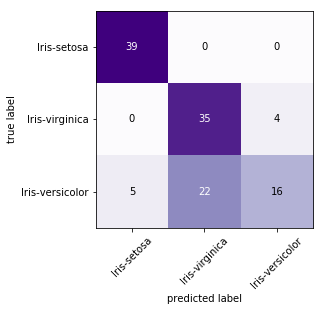

In [540]:
print('Confusion matrix for train dataset')
fig1, ax1 = plot_confusion_matrix(conf_mat=iris_con_train,class_names=['Iris-setosa','Iris-virginica','Iris-versicolor'],cmap='Purples')
plt.show()

In [541]:
# show accuracy

In [542]:
def Accuracy(m):
    rows, columns = m.shape
    row = 0
    a=0
    while row<rows:
        b=m[row][row]
        a=a+b
        row = row+1
    print('Accuracy',(a/m.sum()))

In [543]:
print('For Train Dataset:')
Accuracy(iris_con_train)
print('\nFor Test Dataset:')
Accuracy(iris_con_test)

For Train Dataset:
Accuracy 0.743801652892562

For Test Dataset:
Accuracy 0.8064516129032258


In [544]:
print('Score for train dataset:',NB.score(x_train,y_train))
print('Score for test dataset:',NB.score(x_test,y_test))

Score for train dataset: 0.743801652892562
Score for test dataset: 0.8064516129032258


In [545]:
#Show precision and Recall metrics

In [546]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

pre_dat=pd.DataFrame(classification_report(y_test,y_pred_test,output_dict=True)).T
pre_dat.reset_index(inplace=True)
pre_dat['index']=pre_dat['index'].map(lambda x:'Iris-setosa' if x=='0' else ('Iris-virginica' if x=='1' else ('Iris-versicolor' if x=='2' else x)))
pre_dat=pre_dat.set_index('index')
print('precision and Recall metrics shown below')
pre_dat

precision and Recall metrics shown below


,f1-score,precision,recall,support
index,,,,
Iris-setosa,0.956522,0.916667,1.000000,11.0
Iris-virginica,0.800000,0.833333,0.769231,13.0
Iris-versicolor,0.571429,0.571429,0.571429,7.0
micro avg,0.806452,0.806452,0.806452,31.0
macro avg,0.775983,0.773810,0.780220,31.0
weighted avg,0.803927,0.803763,0.806452,31.0


In [547]:
print('We can observe that recall avg is 0.80 (80%)')

We can observe that recall avg is 0.80 (80%)


## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [548]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [549]:
iris_data_1 = pd.read_csv('Iris.csv')

In [550]:
iris_data=iris_data_1.copy()
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [551]:
print('From info, we can see that there are NaN values present in the dataset')
print('Checking for Nan Values\n',iris_data.isna().sum())

From info, we can see that there are NaN values present in the dataset
Checking for Nan Values
 Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


In [552]:
iris_data.quantile(.50)
print('Replaced the NaN values to median')
iris_data=iris_data.fillna((iris_data.quantile(0.50)))    
iris_data.isna().sum()

Replaced the NaN values to median


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [553]:
print('We can see that there is one categorical variable (Species)')
iris_data.head()

We can see that there is one categorical variable (Species)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [554]:
print('Changing the categorical to numerical variable')
iris_data['Species']=iris_data['Species'].map(lambda x:0 if x=='Iris-setosa' else (1 if x=='Iris-virginica' else 2))

Changing the categorical to numerical variable


In [555]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [556]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.20,2.0,1
148,149,6.2,3.4,5.40,2.3,1
149,150,5.9,3.0,5.10,1.8,1
150,151,5.9,3.0,4.35,1.3,1
151,152,5.8,3.0,4.35,1.8,1


In [557]:
print('Dropping "Id" variable')
iris_data=iris_data.drop(columns='Id')

Dropping "Id" variable


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

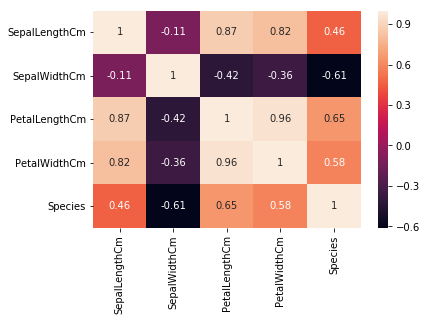

In [558]:
sns.heatmap(iris_data.corr(),annot=True)

In [559]:
print('We can observed that there is no correlation in range -0.1 to 0.1, thus no variables/columns are dropped')

We can observed that there is no correlation in range -0.1 to 0.1, thus no variables/columns are dropped


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [562]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Species ~ SepalLengthCm +  SepalWidthCm 
        + PetalLengthCm + PetalWidthCm """,iris_data)
vif

,Variable,VIF
0,Intercept,132.2
1,SepalLengthCm,7.1
2,SepalWidthCm,2.1
3,PetalLengthCm,31.0
4,PetalWidthCm,15.9


In [521]:
print('We can observe that there is no variables having alomost zero or <0.1, thus no varibles are dropped')

We can observe that there is no variables having alomost zero or <0.1, thus no varibles are dropped


## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002689A54B2B0>,
      dtype=object)

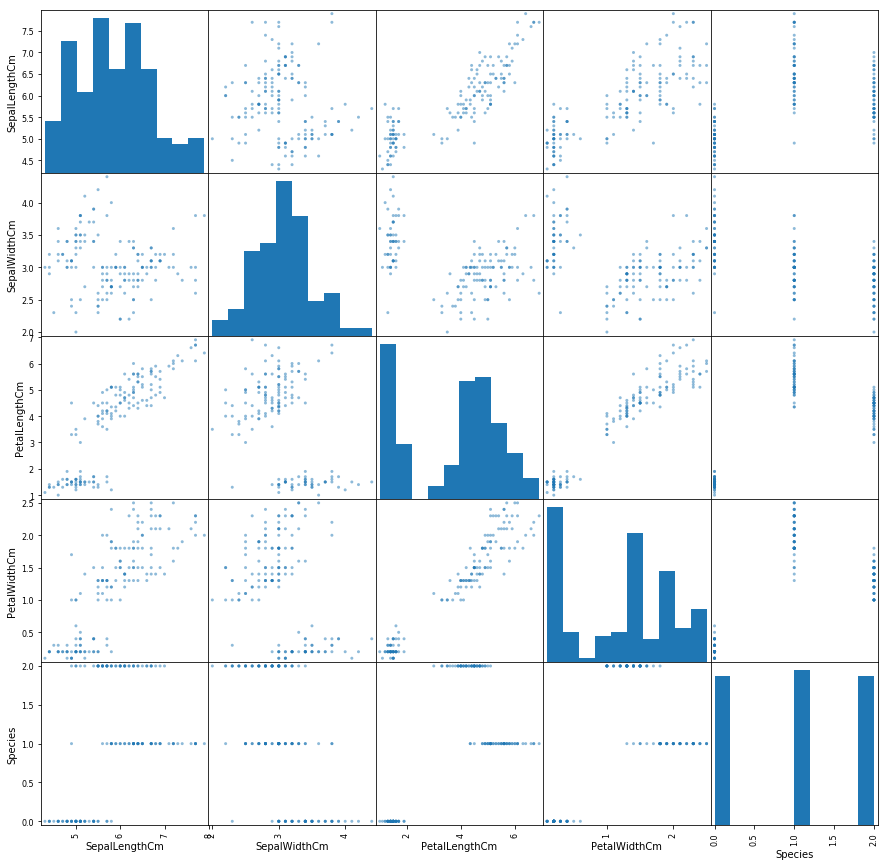

In [522]:
scatter_matrix(iris_data, figsize=(15,15))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [527]:
from sklearn.model_selection import train_test_split
x=iris_data.drop(columns='Species')
y=iris_data['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,train_size=0.8,random_state=45) #Split the train and test dataset

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [528]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
i=np.array([3,5,9])
n=0
while n<=len(i)-1:
    k=i[n]
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
    KNN_model.fit(x_train,y_train)
    y_pred_train = KNN_model.predict(x_train)
    y_pred_test=KNN_model.predict(x_test)
    print('\nAccuracy for train dataset for (K=',k,')=',1-accuracy_score(y_train,y_pred_train))
    print('Accuracy for test dataset for (K=',k,')=',1-accuracy_score(y_test,y_pred_test))
    n=n+1


Accuracy for train dataset for (K= 3 )= 0.05785123966942152
Accuracy for test dataset for (K= 3 )= 0.032258064516129004

Accuracy for train dataset for (K= 5 )= 0.04958677685950408
Accuracy for test dataset for (K= 5 )= 0.032258064516129004

Accuracy for train dataset for (K= 9 )= 0.04132231404958675
Accuracy for test dataset for (K= 9 )= 0.032258064516129004


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [529]:
j = np.arange(1,19,2)
n=0
MSE=[]
k_val=[]
while n<=len(j)-1:
    k=j[n]
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
    KNN_model.fit(x_train,y_train)
    y_pred_train = KNN_model.predict(x_train)
    MSE.append(1-accuracy_score(y_train,y_pred_train))
    k_val.append(k)
    dataplot=pd.DataFrame([k_val,MSE]).T
    n=n+1
    dataplot.columns=['k','MSE']


print('We can observe that at k=1 the MSE is 0.00, which is the case with most of the dataset, however i would consider k=15 which would give me optimum',
      'accuracy with MSE as 0.0247')
dataplot

We can observe that at k=1 the MSE is 0.00, which is the case with most of the dataset, however i would consider k=15 which would give me optimum accuracy with MSE as 0.0247


,k,MSE
0,1.0,0.000000
1,3.0,0.057851
2,5.0,0.049587
3,7.0,0.033058
4,9.0,0.041322
5,11.0,0.033058
6,13.0,0.033058
7,15.0,0.024793
8,17.0,0.033058


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

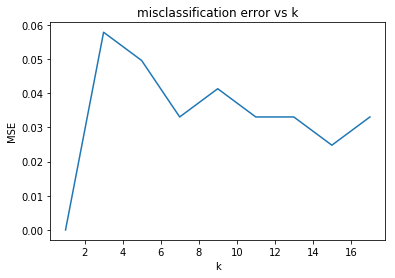

In [530]:
py=sns.lineplot(x='k', y='MSE',data=dataplot).set_title('misclassification error vs k')